<a href="https://colab.research.google.com/github/raulbenitez/LEUKEMIA_database/blob/main/Leukemia_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALL-IDB database

Acute Lymphoblastic Leukemia Image Database for Image Processing

Department of Computer Science - Università degli Studi di Milano

https://homes.di.unimi.it/scotti/all/

https://www.kaggle.com/nikhilsharma00/leukemia-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import numpy as np
import skimage as sk # load skimage libraries
from skimage import io
import pandas as pd

root_folder_im = '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im'
root_folder_pos = '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc'

VOL = io.ImageCollection(root_folder_im + '/*.jpg')

v=[]
zt = []

for root, dirs, files in os.walk(root_folder_pos, topdown=False):
    for name in sorted(files):
        #print(os.path.join(root, name))
        z = np.loadtxt(os.path.join(root, name),ndmin=2) # get cell positions
        y = np.repeat([np.int(name[-9:-6]), np.int(name[-5])], z.shape[0], axis=0) # get image number and class label
        y = np.reshape(y,(2,np.int(y.shape[0]/2))).T

        if (z.shape[0]==0):
          z = [0,0,np.int(name[-9:-6]), np.int(name[-5])]
        else:
          z = np.concatenate((z,y),axis=1)
        zt = np.append(zt,z)

zt = np.reshape(zt,(np.int(zt.shape[0]/4),4))
df = pd.DataFrame(zt,columns=['x','y','image','class'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im034_0.xyc"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im035_0.xyc"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im036_0.xyc"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im037_0.xyc"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Empty input file: "/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/xyc/Im038_0.xyc"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: loadtxt: Emp

In [29]:
df.head()

,x,y,image,class
0,886.0,726.0,1.0,1.0
1,796.0,653.0,1.0,1.0
2,894.0,611.0,1.0,1.0
3,964.0,681.0,1.0,1.0
4,1020.0,605.0,1.0,1.0


Visualize image with marked cells

In [30]:
VOL[0].shape

(1368, 1712, 3)

In [31]:
df1=df.loc[df['image']==1]
pos = np.int64(df1[['x','y']].values)

In [32]:
VOL.files

['/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im001_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im002_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im003_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im004_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im005_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im006_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im007_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im008_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im009_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im010_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im011_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/Im012_1.jpg',
 '/content/drive/MyDrive/Leukemia_database/ALL_IDB1/ALL_IDB1/im/

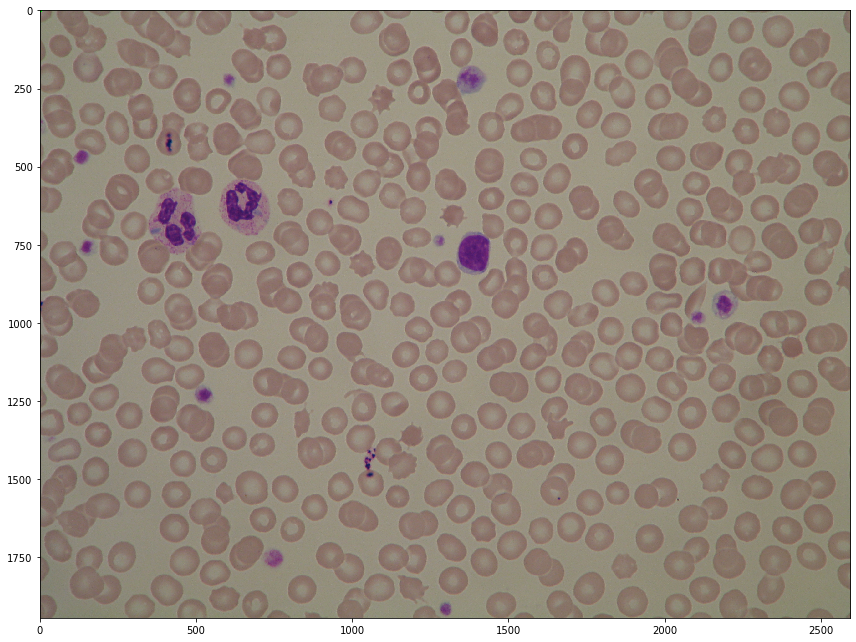

In [37]:
import skimage as sk # load skimage libraries
import matplotlib.pyplot as plt

IM_number = 108
df1=df.loc[df['image']==IM_number]
pos = np.int64(df1[['x','y']].values)

for kpos in np.arange(pos.shape[0]):
  VOL[IM_number-1][pos[kpos,1]:pos[kpos,1]+5,pos[kpos,0]:pos[kpos,0]+5,:]=[0,255,0]

fig = plt.figure(figsize=(12,12))
sk.io.imshow(VOL[IM_number-1]) # visualize image using imshow function
sk.io.show() 

# GMM clustering segmentation

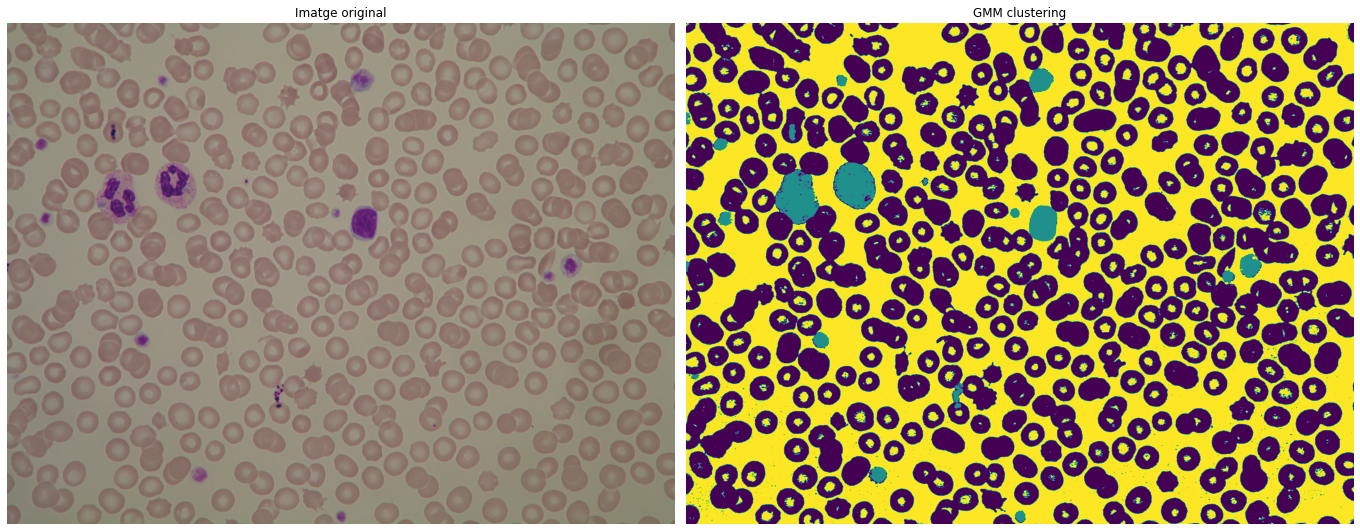

In [38]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec


I = VOL[IM_number-1] # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array
gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_segment = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(19, 19))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_segment)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

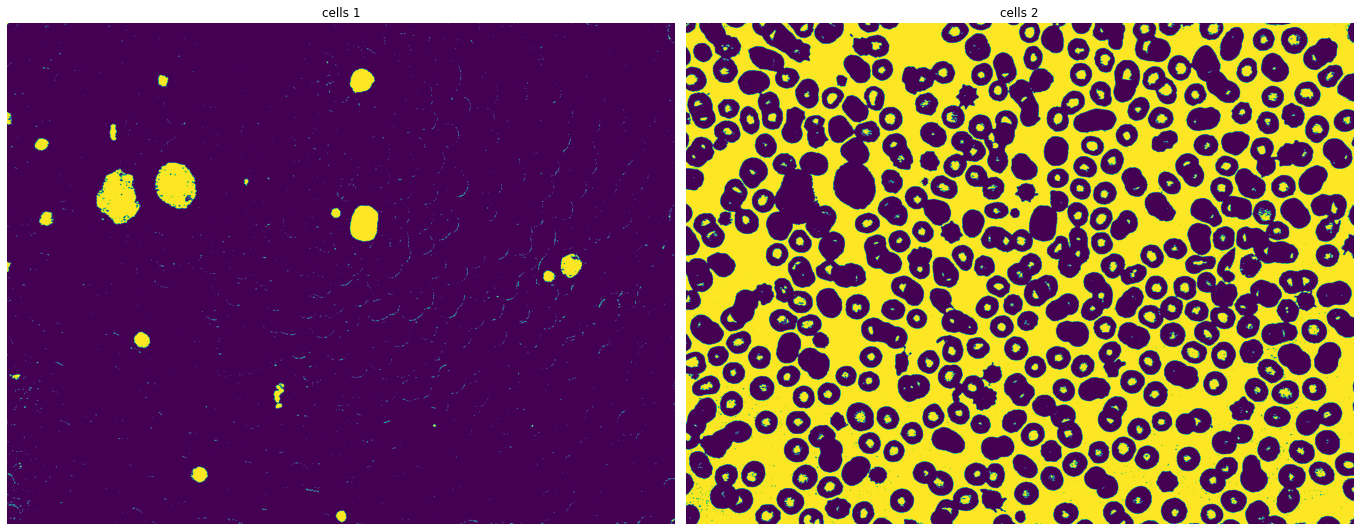

In [39]:
fig = plt.figure(figsize=(19, 19))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_segment==1)
ax0.set_title('cells 1')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_segment==2)
ax1.set_title('cells 2')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

In [46]:
from skimage import data, measure
label_image, nregions = measure.label(I_segment==1,return_num=True)
props_aux = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])
dfa = pd.DataFrame(props_aux)
df1 = dfa.loc[dfa['area']>500]
df1.head(20)

,label,area,eccentricity,extent
189,190,6565,0.452218,0.712425
213,214,1311,0.520387,0.709416
390,391,622,0.938049,0.622000
464,465,1279,0.931757,0.702747
560,561,1867,0.533323,0.707197
690,691,20792,0.540428,0.721468
722,723,23052,0.655818,0.623364
953,954,12453,0.645839,0.801351
965,966,1069,0.312001,0.760313
988,989,2136,0.503538,0.669173


In [47]:
df1.shape

(16, 4)

In [51]:
from skimage import data, measure
label_image, nregions = measure.label(I_segment==2,return_num=True)
props_aux = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])
dfb = pd.DataFrame(props_aux)
df2 = dfb.loc[dfb['area']>500]
df2.head(20)

,label,area,eccentricity,extent
1,2,2285595,0.635778,0.453595
13,14,1331,0.579935,0.643617
14,15,591,0.802192,0.656667
18,19,962,0.216916,0.650000
24,25,1209,0.532947,0.629687
28,29,1274,0.545727,0.705426
46,47,1185,0.535011,0.626984
55,56,593,0.363079,0.681609
64,65,793,0.862267,0.471182
68,69,867,0.534539,0.682140


In [52]:
df2.shape

(161, 4)

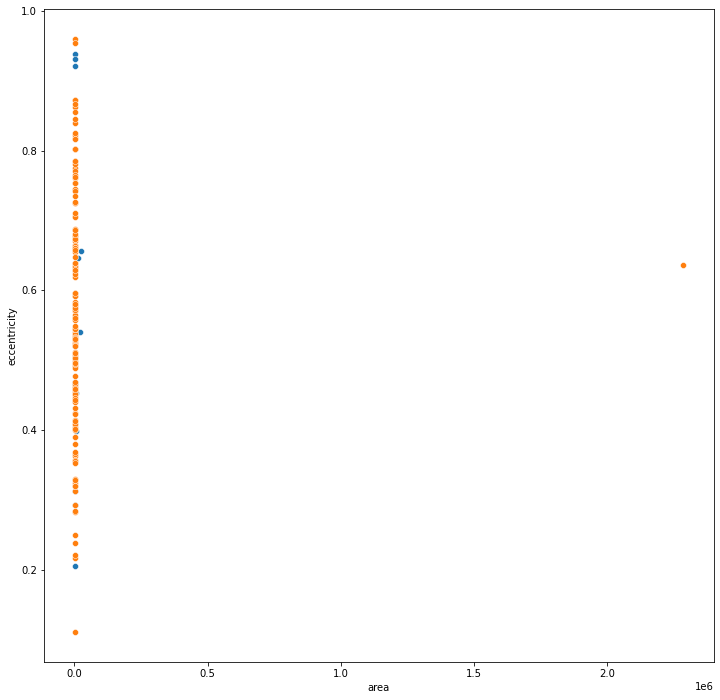

In [53]:
import seaborn as sns

fig = plt.figure(figsize=(12,12))

sns.scatterplot(x='area',y='eccentricity',data=df1,palette="deep")
sns.scatterplot(x='area',y='eccentricity',data=df2,palette="pastel")
